In [170]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
import os




In [63]:
os.chdir("/home/darkstar/Documents/pg-dbda/module8_machine_learning/lab_exam/mock_lab_exam/Set A")

In [64]:
hr = pd.read_csv('HR_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [65]:
hr_dumm = pd.get_dummies(hr, drop_first=True, dtype=int)
hr_dumm
X = hr_dumm.drop(['left'], axis = 1)
y = hr_dumm['left']


In [66]:
kfold = KFold(n_splits=5, shuffle=True, random_state = 23)
lr = LogisticRegression(max_iter=1000)
result = cross_val_score(lr, X, y, cv=kfold, scoring='neg_log_loss')
print(result.mean())

-0.43018252475840313


In [67]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 23)
rf = RandomForestClassifier(random_state=23) 
params = {'max_depth':[None, 4, 7]}
gcv = GridSearchCV(rf, param_grid=params, verbose=3, cv = kfold, scoring='neg_log_loss')
gcv.fit(X, y)
print(gcv.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...................max_depth=None;, score=-0.073 total time=   0.8s
[CV 2/5] END ...................max_depth=None;, score=-0.090 total time=   0.7s
[CV 3/5] END ...................max_depth=None;, score=-0.055 total time=   0.7s
[CV 4/5] END ...................max_depth=None;, score=-0.118 total time=   0.7s
[CV 5/5] END ...................max_depth=None;, score=-0.101 total time=   0.7s
[CV 1/5] END ......................max_depth=4;, score=-0.237 total time=   0.3s
[CV 2/5] END ......................max_depth=4;, score=-0.229 total time=   0.4s
[CV 3/5] END ......................max_depth=4;, score=-0.230 total time=   0.4s
[CV 4/5] END ......................max_depth=4;, score=-0.240 total time=   0.4s
[CV 5/5] END ......................max_depth=4;, score=-0.228 total time=   0.4s
[CV 1/5] END ......................max_depth=7;, score=-0.127 total time=   0.5s
[CV 2/5] END ......................max_depth=7;, 

In [68]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 23)
clf = XGBClassifier(random_state=23)
params = {'learning_rate':[0.001, 0.5], 'n_estimators':[20, 30], 'max_depth':[3,5]}
gcv = GridSearchCV(clf, param_grid=params, verbose=3, cv = kfold, scoring='neg_log_loss')
gcv.fit(X, y)
print(gcv.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=20;, score=-0.677 total time=   0.1s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=20;, score=-0.677 total time=   0.1s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=20;, score=-0.677 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=20;, score=-0.677 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=20;, score=-0.677 total time=   0.1s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=30;, score=-0.669 total time=   0.1s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=30;, score=-0.669 total time=   0.1s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=30;, score=-0.669 total time=   0.1s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=30;, score=-0.669 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=30;, sc

In [69]:
insu = pd.read_csv('insurance.csv')
insu

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
insu_dumm = pd.get_dummies(insu, drop_first=True, dtype=int)
X = insu_dumm.drop(['charges'], axis = 1)
y = insu['charges']


In [80]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
clf = XGBRegressor(random_state=23)
params = {'learning_rate':[0.001, 0.5, 0.3, 0.6], 'n_estimators':[20, 30]}
gcv = GridSearchCV(clf, param_grid=params, cv =kfold, scoring='neg_mean_squared_error')
gcv.fit(X, y)
print(gcv.best_score_)

-22946429.144385204


In [74]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
lasso = Lasso()
print(lasso.get_params())


{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [78]:
params = {'alpha': [0.1, 1, 1.5, 2]}
gcv = GridSearchCV(lasso, param_grid=params,verbose=3,
                   cv=kfold, scoring='neg_mean_squared_error')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................alpha=0.1;, score=-3991.213 total time=   0.0s
[CV 2/5] END .....................alpha=0.1;, score=-4282.861 total time=   0.0s
[CV 3/5] END .....................alpha=0.1;, score=-4127.566 total time=   0.0s
[CV 4/5] END .....................alpha=0.1;, score=-4499.574 total time=   0.0s
[CV 5/5] END .....................alpha=0.1;, score=-4156.886 total time=   0.0s
[CV 1/5] END .......................alpha=1;, score=-3991.296 total time=   0.0s
[CV 2/5] END .......................alpha=1;, score=-4282.913 total time=   0.0s
[CV 3/5] END .......................alpha=1;, score=-4127.495 total time=   0.0s
[CV 4/5] END .......................alpha=1;, score=-4500.055 total time=   0.0s
[CV 5/5] END .......................alpha=1;, score=-4157.232 total time=   0.0s
[CV 1/5] END .....................alpha=1.5;, score=-3991.343 total time=   0.0s
[CV 2/5] END .....................alpha=1.5;, sco

In [100]:
nut = pd.read_csv('nutrient.csv')
food_items = nut['Food_Item']
nut = nut.drop(['Food_Item'], axis = 1)
nut

,energy,protein,fat,calcium,iron
0,340,20,28,9,2.6
1,245,21,17,9,2.7
2,420,15,39,7,2.0
3,375,19,32,9,2.6
4,180,22,10,17,3.7
5,115,20,3,8,1.4
6,170,25,7,12,1.5
7,160,26,5,14,5.9
8,265,20,20,9,2.6
9,300,18,25,9,2.3


In [94]:
scaler = StandardScaler()
nut_scaled = scaler.fit_transform(nut)

In [95]:
pca = PCA()
pca.fit(nut_scaled)

PCA()

In [97]:
ex_var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(ex_var_ratio)


array([0.43926469, 0.66844264, 0.83798533, 0.99967967, 1.        ])

In [104]:
num_components_70 = np.argmax(cum_var_ratio >= 0.7) + 1

# Transform the data with the selected number of components
X_reduced = pca.transform(nut_scaled)[:, :num_components_70]

# Create a DataFrame for the reduced data with principal components
columns_pca = [f'PC{i+1}' for i in range(num_components_70)]
data_pca = pd.DataFrame(X_reduced, columns=columns_pca)

# Concatenate the 'Food_Item' column back to the reduced DataFrame
data_pca = pd.concat([food_items, data_pca], axis=1)
data_pca

,Food_Item,PC1,PC2,PC3
0,BEEF BRAISED,1.894907,0.318029,0.003579
1,HAMBURGER,0.659812,-0.079563,0.512841
2,BEEF ROAST,2.936755,1.122724,-1.097788
3,BEEF STEAK,2.321069,0.585663,-0.239173
4,BEEF CANNED,-0.256477,0.054382,1.168707
5,CHICKEN BROILED,-0.932996,-0.905719,0.393767
6,CHICKEN CANNED,-0.185016,-1.564189,0.789681
7,BEEF HEART,-0.699024,0.346282,2.595080
8,LAMB LEG ROAST,0.937389,0.108904,0.274877
9,LAMB SHOULDER ROAST,1.409838,0.415262,-0.211434


In [133]:
nut = pd.read_csv("nutrient.csv",index_col=0)

scaler = StandardScaler()
nutscaled=scaler.fit_transform(nut)


sil = []
clust = np.arange(3,11)
for i in clust:
    clustering = KMeans(n_clusters=i, n_init=10, random_state=23)
    clustering.fit(nutscaled)
    sil.append(silhouette_score(nutscaled,
                                clustering.labels_))

i_max = np.argmax(sil)
print("Best no. of clusters =",clust[i_max])

#### clustering with best k

km = KMeans(n_clusters=clust[i_max] , n_init=10, random_state=23)
km.fit(nutscaled)
print(km.labels_)

nut['Clust'] = km.labels_

nut.sort_values(by='Clust')

nut.groupby('Clust').mean()

Best no. of clusters = 4
[2 0 2 2 0 0 0 0 2 2 2 2 2 0 0 0 1 1 0 0 0 0 0 0 3 0 0]


,energy,protein,fat,calcium,iron
Clust,,,,,
0,160.625,20.1875,7.625,37.125,1.93125
1,57.500,9.0000,1.000,78.000,5.70000
2,341.875,18.7500,28.875,8.750,2.43750
3,180.000,22.0000,9.000,367.000,2.50000


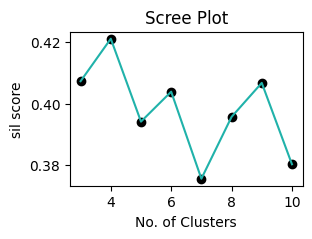

In [128]:
plt.figure(figsize=(3,2))
plt.scatter(clust, sil, color='black')
plt.plot(clust, sil, color='lightseagreen')
plt.xlabel("No. of Clusters")
plt.ylabel("sil score")
plt.title("Scree Plot")
plt.show()

In [150]:
df = pd.read_csv('ZILLOW-M1301_MLPSF.csv')
df.shape

(83, 2)

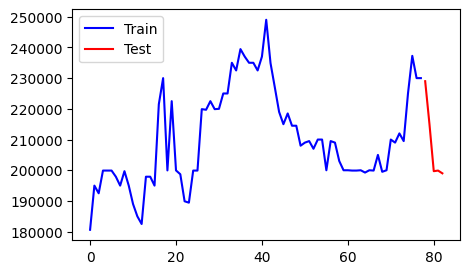

In [173]:
y_train = df['Value'][:-5]
y_test = df['Value'][-5:]

plt.figure(figsize=(5,3))
plt.plot(y_train, label='Train', color='blue')
plt.plot(y_test, label='Test', color='red')
plt.legend(loc='best')

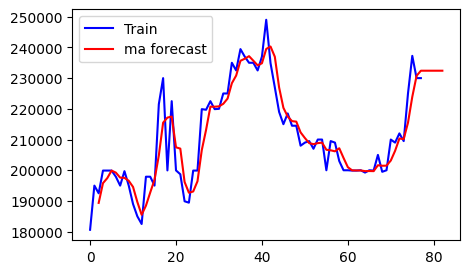

In [187]:
errors = []
forecast = y_train.rolling(3, center=False).mean()
last_moving_avg = forecast.iloc[-1]
forecast_series = pd.Series(last_moving_avg.repeat(len(y_test)))
moving_avg_forecast = pd.concat([forecast, forecast_series], ignore_index=True)

plt.figure(figsize=(5,3))
plt.plot(y_train, label='Train', color='blue')
plt.plot(moving_avg_forecast, label='ma forecast', color='red')
plt.legend(loc='best')
plt.show()

In [188]:
print("MSE: ", mean_squared_error(y_test, forecast_series))
errors.append(mean_squared_error(y_test, forecast_series))

MSE:  711880277.7777773


/home/darkstar/lang/python/venv/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


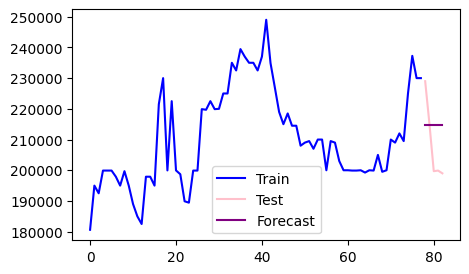

MSE = 178679982.15425345


In [189]:
## Simple Exponential Smoothing
alpha = 0.1
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
# plot
plt.figure(figsize=(5,3))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.legend(loc='best')
plt.show()

print("MSE =",mean_squared_error(y_test, fcast1))
errors.append(mean_squared_error(y_test, fcast1))

/home/darkstar/lang/python/venv/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


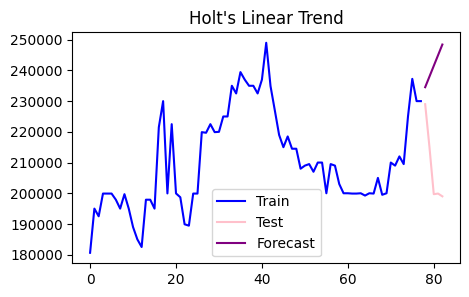

MSE = 1355754579.6726785


In [190]:
alpha = 0.8
beta = 0.02
### Linear Trend
fit1 = Holt(y_train).fit(smoothing_level=alpha, 
                         smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

# plot
plt.figure(figsize=(5,3))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

print("MSE =",mean_squared_error(y_test, fcast1))
errors.append(mean_squared_error(y_test, fcast1))


/home/darkstar/lang/python/venv/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


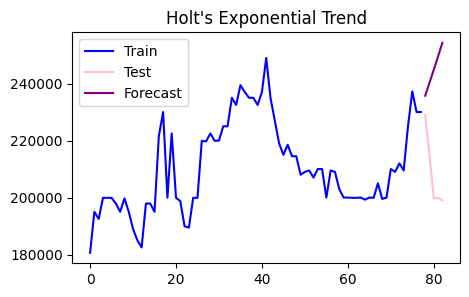

MSE = 1648547772.6488557


In [191]:
# Holt's Exponential Method
alpha = 0.8
beta = 0.02
### Linear Trend
fit1 = Holt(y_train, exponential=True).fit(smoothing_level=alpha, 
                         smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

# plot
plt.figure(figsize=(5,3))
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("Holt's Exponential Trend")
plt.legend(loc='best')
plt.show()

print("MSE =",mean_squared_error(y_test, fcast1))
errors.append(mean_squared_error(y_test, fcast1))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1636.422, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1730.034, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1635.811, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1693.325, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2135.946, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1634.450, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1636.335, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1636.299, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1635.340, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1636.997, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.813 seconds
MSE = 348364409.4544486


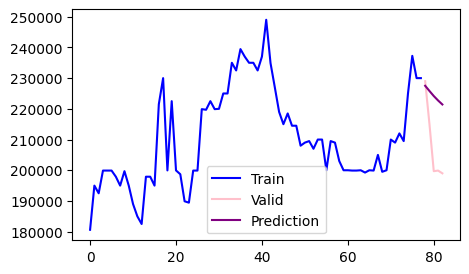

In [194]:
from pmdarima.arima import auto_arima

########## ARIMA ####################
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])
print("MSE =",mean_squared_error(y_test, forecast)) 
errors.append(mean_squared_error(y_test, forecast))

#plot the predictions for validation set
plt.figure(figsize=(5,3))
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [196]:
print(max(errors))

1648547772.6488557
